# 数据处理

In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split

# 加载数据  
df = pd.read_csv("train.csv")  
  
#去除唯一属性id，分离特征
X = df.drop(['id', 'target'], axis=1) 
#将target目标值赋给y
y = df['target']  
  
# 划分数据集为训练集和测试集  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2.2 决策树模型

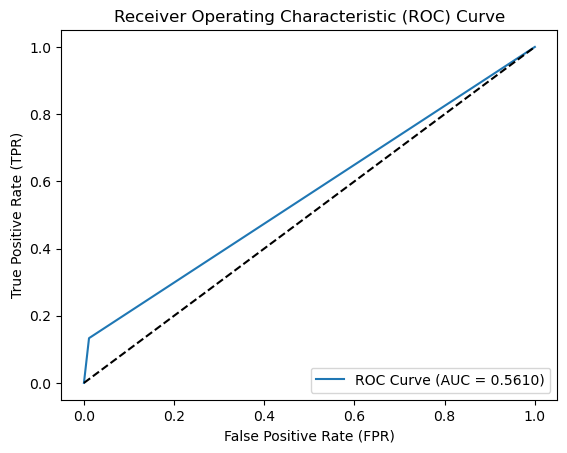

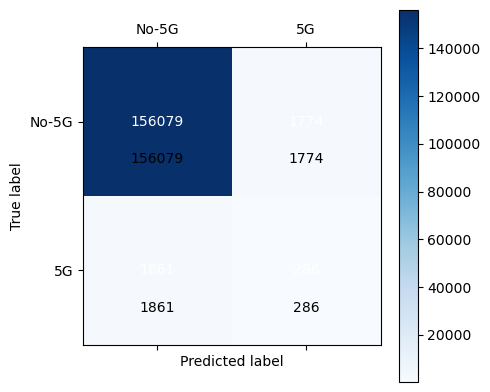

混淆矩阵：
[[156079   1774]
 [  1861    286]]

AUC指标为0.5610


In [12]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix,roc_curve,roc_auc_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#决策树模型
estimator_tree = DecisionTreeClassifier()
estimator_tree.fit(X_train,y_train)

#模型评估
score_tree = estimator_tree.score(X_test,y_test)
y_pred = estimator_tree.predict(X_test)
# report_tree = classification_report(y_test,y_pred,labels=[0,1],target_names=['不是5G用户','是5G用户'])
auc_tree = roc_auc_score(y_test,y_pred)

# 计算混淆矩阵
y_pred = estimator_tree.predict(X_test)
confusion = confusion_matrix(y_test, y_pred)

# 绘制 ROC 曲线
y_pred_proba = estimator_tree.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr, label='ROC Curve (AUC = %0.4f)' % auc_tree)
plt.plot([0, 1], [0, 1], 'k--')  # 绘制对角线
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# 绘制混淆矩阵
plt.matshow(confusion, cmap=plt.cm.Blues)
plt.colorbar()
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.xticks([0, 1], ['No-5G', '5G'])
plt.yticks([0, 1], ['No-5G', '5G'])
for i in range(2):
    for j in range(2):
        plt.text(j, i, confusion[i, j], ha='center', va='center', color='white')
        plt.text(j, i+0.25, str(confusion[i,j]), ha='center', va='center', color='black')
plt.show()

# 打印混淆矩阵和 AUC
print("混淆矩阵：")
print(confusion)
print('\nAUC指标为%.4f' % auc_tree)



### 使用y_pred_proba来取代y_pred

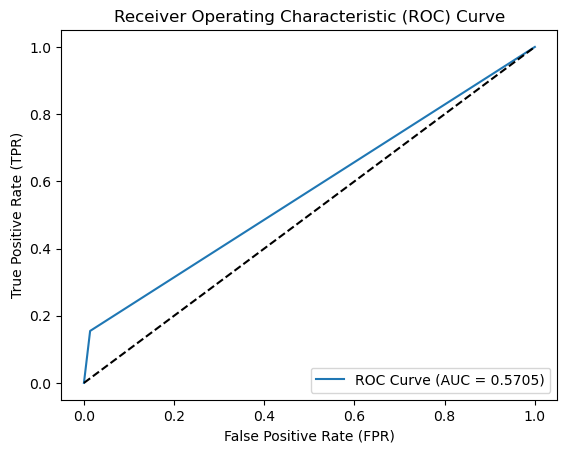

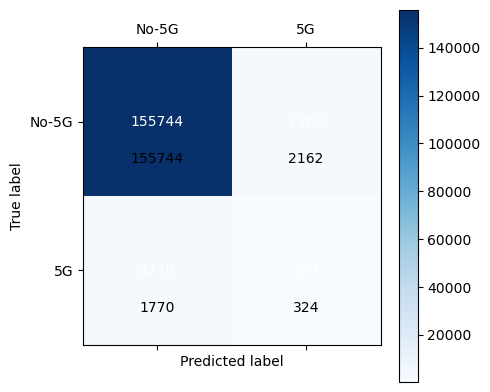

混淆矩阵：
[[155744   2162]
 [  1770    324]]

AUC指标为0.5705


In [13]:
from sklearn.tree import DecisionTreeClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
#决策树模型
estimator_trees = DecisionTreeClassifier()
estimator_trees.fit(X_train,y_train)

#模型评估
y_pred_proba = estimator_trees.predict_proba(X_test)[:,1]
auc_trees = roc_auc_score(y_test,y_pred_proba)

# 计算混淆矩阵
y_pred = estimator_trees.predict(X_test)
confusion = confusion_matrix(y_test, y_pred)

# 绘制 ROC 曲线
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr, label='ROC Curve (AUC = %0.4f)' % auc_trees)
plt.plot([0, 1], [0, 1], 'k--')  # 绘制对角线
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# 绘制混淆矩阵
plt.matshow(confusion, cmap=plt.cm.Blues)
plt.colorbar()
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.xticks([0, 1], ['No-5G', '5G'])
plt.yticks([0, 1], ['No-5G', '5G'])
for i in range(2):
    for j in range(2):
        plt.text(j, i, confusion[i, j], ha='center', va='center', color='white')
        plt.text(j, i+0.25, str(confusion[i,j]), ha='center', va='center', color='black')
plt.show()

# 打印混淆矩阵和 AUC
print("混淆矩阵：")
print(confusion)
print('\nAUC指标为%.4f' % auc_trees)

### 选择DecisionTreeClassifier的更好的参数并测试

In [52]:
from sklearn.model_selection import GridSearchCV
# 定义参数网格
params = {
    'max_depth': [3, 5, 7,8,9,10,11,12,13],
    'min_samples_split': [2, 4, 6,8,10,12,14,16]
}

# 初始化决策树分类器
dt = DecisionTreeClassifier(random_state=42)

# 进行网格搜索
grid_search = GridSearchCV(dt, param_grid=params, cv=5, scoring='roc_auc')
grid_search.fit(X_train, y_train)

# 输出最佳参数和AUC分数
print("最佳参数：", grid_search.best_params_)
print("最佳AUC分数：", grid_search.best_score_)

最佳参数： {'max_depth': 10, 'min_samples_split': 14}
最佳AUC分数： 0.8438191476385166


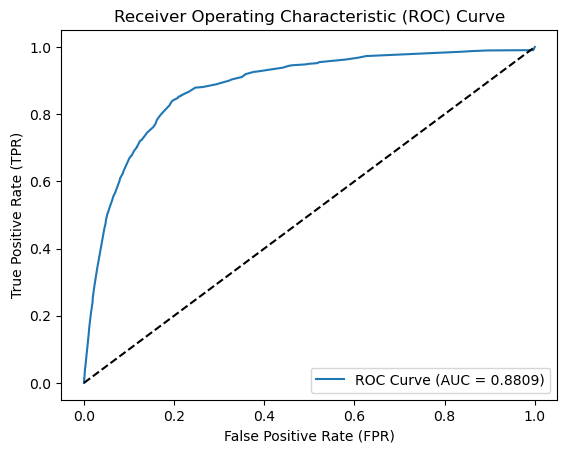


AUC指标为0.8809
0.5040731769729747


In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
estimator_tree = DecisionTreeClassifier(max_depth=10, min_samples_split= 14)
estimator_tree.fit(X_train,y_train)

score_tree = estimator_tree.score(X_test,y_test)
y_pred = estimator_tree.predict(X_test)
y_pred_proba = estimator_tree.predict_proba(X_test)[:, 1]
# report_tree = classification_report(y_test,y_pred,labels=[0,1],target_names=['不是5G用户','是5G用户'])
auc_tree = roc_auc_score(y_test,y_pred_proba)

# 计算混淆矩阵
confusion = confusion_matrix(y_test, y_pred)

# 绘制 ROC 曲线
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr, label='ROC Curve (AUC = %0.4f)' % auc_tree)
plt.plot([0, 1], [0, 1], 'k--')  # 绘制对角线
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


print('\nAUC指标为%.4f' % auc_tree)
print(roc_auc_score(y_test,y_pred))


### 选择影响较大的特征值

##### （1）选择方差较小的作为特征值

['cat_3', 'cat_5', 'cat_7', 'cat_8', 'cat_10', 'cat_13', 'cat_14', 'cat_15', 'cat_16', 'cat_17', 'cat_18', 'cat_19', 'num_13', 'num_14', 'num_16', 'num_20', 'num_24', 'num_28', 'num_37']


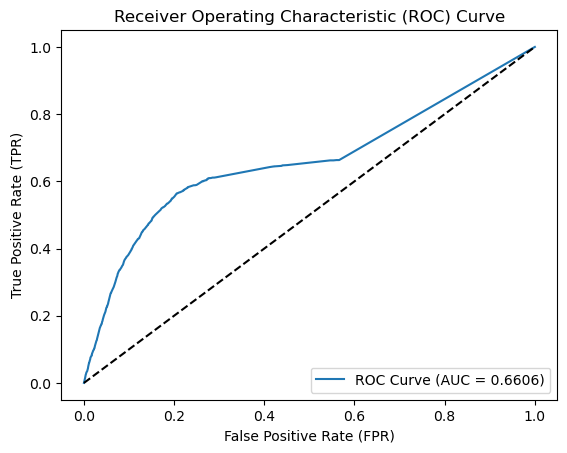


AUC指标为0.6606


In [17]:
selected_features = X.columns[X.std() < 1].tolist()
print(selected_features)
#构建模型
X_selected = X[selected_features]
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42);
tree_selected = DecisionTreeClassifier()
tree_selected.fit(X_train, y_train)

#模型评估
y_pred_proba = tree_selected.predict_proba(X_test)[:,1]
score_tree = tree_selected.score(X_test,y_test)
y_pred = tree_selected.predict(X_test)
report_tree = classification_report(y_test,y_pred,labels=[0,1],target_names=['不是5G用户','是5G用户'])
auc = roc_auc_score(y_test, y_pred_proba)

# 计算混淆矩阵
confusion = confusion_matrix(y_test, y_pred)

# 绘制 ROC 曲线
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr, label='ROC Curve (AUC = %0.4f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')  # 绘制对角线
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

print('\nAUC指标为%.4f' % auc)


#### （2）选择信息增益最大的前10个特征值

['cat_3', 'cat_7', 'cat_8', 'cat_5', 'cat_9', 'cat_10', 'cat_11', 'cat_4', 'num_21', 'cat_12']


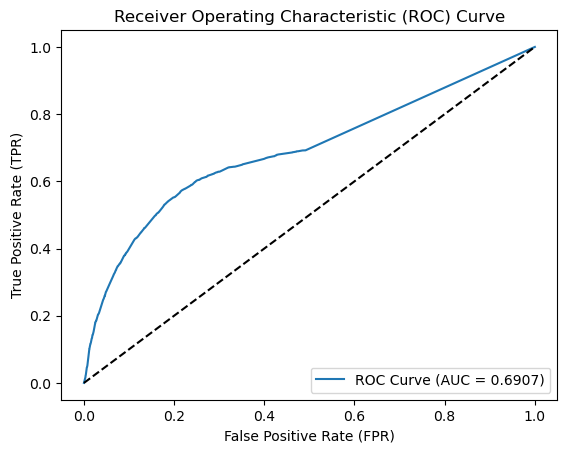

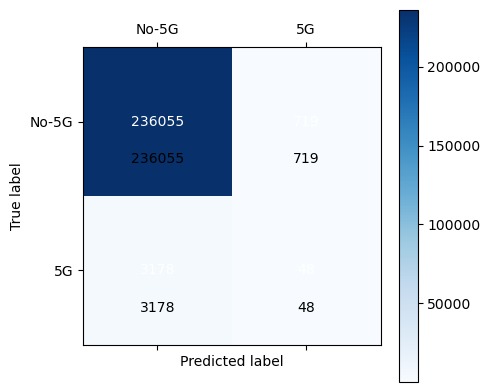

混淆矩阵：
[[236055    719]
 [  3178     48]]

AUC指标为0.6907


In [18]:
from sklearn.feature_selection import mutual_info_classif

#计算每个特征的信息增益
info_gain = mutual_info_classif(X, y)

#创建特征-信息增益字典
feature_info_gain = dict(zip(X.columns, info_gain))

#根据信息增益进行排序
sorted_features = sorted(feature_info_gain, key=feature_info_gain.get, reverse=True)

#选择信息增益最高的前10个特征作为最终特征
selected_feature = sorted_features[:10]
print(selected_feature)

#提取选中的特征
X_selected_msg = X[selected_feature]


#划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X_selected_msg, y, test_size=0.3, random_state=42)

#训练决策树模型
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

#计算AUC
y_pred_proba = dt.predict_proba(X_test)[:, 1]
y_pred = dt.predict(X_test)
auc_tree = roc_auc_score(y_test,y_pred_proba)

# 计算混淆矩阵
confusion = confusion_matrix(y_test, y_pred)

# 绘制 ROC 曲线
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr, label='ROC Curve (AUC = %0.4f)' % auc_tree)
plt.plot([0, 1], [0, 1], 'k--')  # 绘制对角线
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# 绘制混淆矩阵
plt.matshow(confusion, cmap=plt.cm.Blues)
plt.colorbar()
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.xticks([0, 1], ['No-5G', '5G'])
plt.yticks([0, 1], ['No-5G', '5G'])
for i in range(2):
    for j in range(2):
        plt.text(j, i, confusion[i, j], ha='center', va='center', color='white')
        plt.text(j, i+0.25, str(confusion[i,j]), ha='center', va='center', color='black')
plt.show()

# 打印混淆矩阵和 AUC
print("混淆矩阵：")
print(confusion)
print('\nAUC指标为%.4f' % auc_tree)


## 集成学习减少对样本多的一类的过度依赖

##### 随机森林（多个决策树，多个弱分类器组成一个强分类器） 

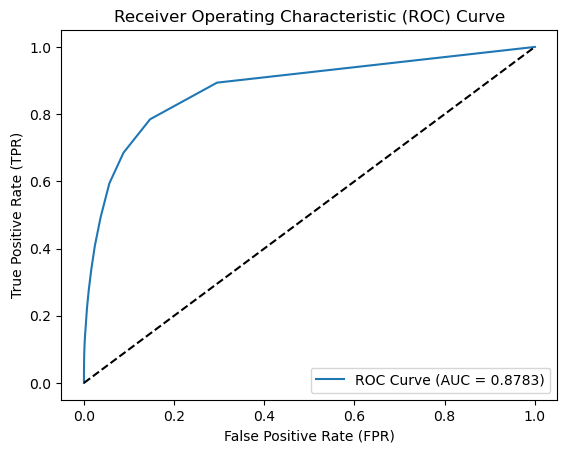

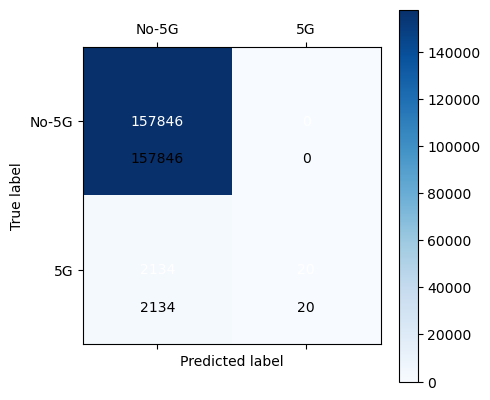

混淆矩阵：
[[157846      0]
 [  2134     20]]

AUC指标为0.8783


In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=41)

# 定义随机森林模型，并进行训练
rf = RandomForestClassifier(n_estimators=50, random_state=30)
rf.fit(X_train, y_train)

# 在测试集上进行预测，并计算 AUC 值和混淆矩阵
y_pred = rf.predict(X_test)
y_pred_proba = rf.predict_proba(X_test)[:, 1]
auc_tree = roc_auc_score(y_test, y_pred_proba)

# 计算混淆矩阵
confusion = confusion_matrix(y_test, y_pred)

# 绘制 ROC 曲线
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr, label='ROC Curve (AUC = %0.4f)' % auc_tree)
plt.plot([0, 1], [0, 1], 'k--')  # 绘制对角线
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# 绘制混淆矩阵
plt.matshow(confusion, cmap=plt.cm.Blues)
plt.colorbar()
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.xticks([0, 1], ['No-5G', '5G'])
plt.yticks([0, 1], ['No-5G', '5G'])
for i in range(2):
    for j in range(2):
        plt.text(j, i, confusion[i, j], ha='center', va='center', color='white')
        plt.text(j, i+0.25, str(confusion[i,j]), ha='center', va='center', color='black')
plt.show()

# 打印混淆矩阵和 AUC
print("混淆矩阵：")
print(confusion)
print('\nAUC指标为%.4f' % auc_tree)


## 集中多个总结集中，再进行一次测试 

['cat_7', 'cat_3', 'cat_8', 'cat_5', 'cat_9', 'cat_10', 'cat_11', 'cat_4', 'num_21', 'cat_12', 'cat_2', 'cat_6', 'cat_13', 'num_22', 'cat_0', 'num_37', 'num_29', 'cat_18', 'cat_19', 'cat_14', 'cat_15', 'cat_1', 'num_30', 'num_3', 'num_11']


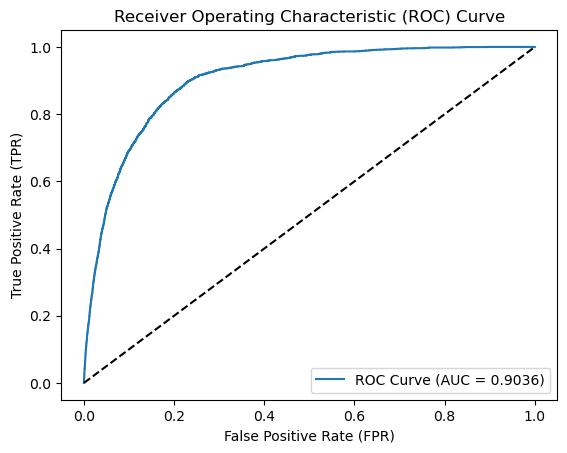

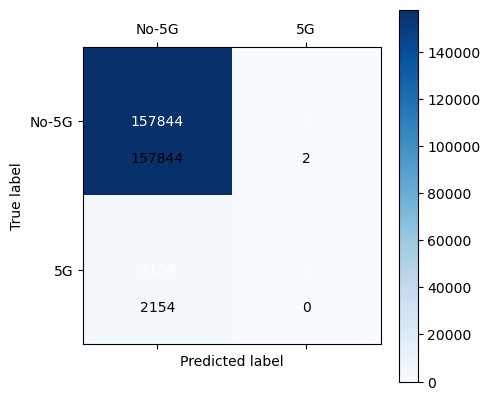

混淆矩阵：
[[157844      2]
 [  2154      0]]

AUC指标为0.9036


In [20]:
from sklearn.feature_selection import mutual_info_classif
#计算每个特征的信息增益
info_gain = mutual_info_classif(X, y)

#创建特征-信息增益字典
feature_info_gain = dict(zip(X.columns, info_gain))

#根据信息增益进行排序
sorted_features = sorted(feature_info_gain, key=feature_info_gain.get, reverse=True)

#选择信息增益最高的前25个特征作为最终特征
selected_feature = sorted_features[:25]
print(selected_feature)

#提取选中的特征
X_selected_msg = X[selected_feature]
X_train, X_test, y_train, y_test = train_test_split(X_selected_msg, y, test_size=0.2, random_state=41)


# 定义随机森林模型，并进行训练
rf = RandomForestClassifier(n_estimators=625, max_depth=10, min_samples_split= 14, random_state=42)
rf.fit(X_train, y_train)

# 在测试集上进行预测，并计算 AUC 值和混淆矩阵
y_pred = rf.predict(X_test)
y_pred_proba = rf.predict_proba(X_test)[:, 1]
auc_tree = roc_auc_score(y_test, y_pred_proba)

# 计算混淆矩阵
confusion = confusion_matrix(y_test, y_pred)

# 绘制 ROC 曲线
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr, label='ROC Curve (AUC = %0.4f)' % auc_tree)
plt.plot([0, 1], [0, 1], 'k--')  # 绘制对角线
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# 绘制混淆矩阵
plt.matshow(confusion, cmap=plt.cm.Blues)
plt.colorbar()
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.xticks([0, 1], ['No-5G', '5G'])
plt.yticks([0, 1], ['No-5G', '5G'])
for i in range(2):
    for j in range(2):
        plt.text(j, i, confusion[i, j], ha='center', va='center', color='white')
        plt.text(j, i+0.25, str(confusion[i,j]), ha='center', va='center', color='black')
plt.show()

# 打印混淆矩阵和 AUC
print("混淆矩阵：")
print(confusion)
print('\nAUC指标为%.4f' % auc_tree)
